In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime


In [8]:
import yfinance as yf
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)
tickers = ['BAC',
    'C',
    'GS',
    'JPM',
    'MS',
    'WFC']

bank_data ={ticker : yf.download(ticker,start = start, end = end,auto_adjust=False) for ticker in tickers}



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
bank_stocks = pd.concat(bank_data, axis = 1)


In [10]:
bank_stocks.columns = bank_stocks.columns.droplevel(0)

In [36]:

bank_stocks.columns = bank_stocks.columns.swaplevel(0,1)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

print(bank_stocks.columns.to_frame(index = False))


   Bank Ticker Stock Info
0          BAC  Adj Close
1          BAC      Close
2          BAC       High
3          BAC        Low
4          BAC       Open
5          BAC     Volume
6            C  Adj Close
7            C      Close
8            C       High
9            C        Low
10           C       Open
11           C     Volume
12          GS  Adj Close
13          GS      Close
14          GS       High
15          GS        Low
16          GS       Open
17          GS     Volume
18         JPM  Adj Close
19         JPM      Close
20         JPM       High
21         JPM        Low
22         JPM       Open
23         JPM     Volume
24          MS  Adj Close
25          MS      Close
26          MS       High
27          MS        Low
28          MS       Open
29          MS     Volume
30         WFC  Adj Close
31         WFC      Close
32         WFC       High
33         WFC        Low
34         WFC       Open
35         WFC     Volume


In [33]:

bank_stocks.xs(key = "Close",axis = 1,level = "Stock Info").max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [37]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick + 'Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


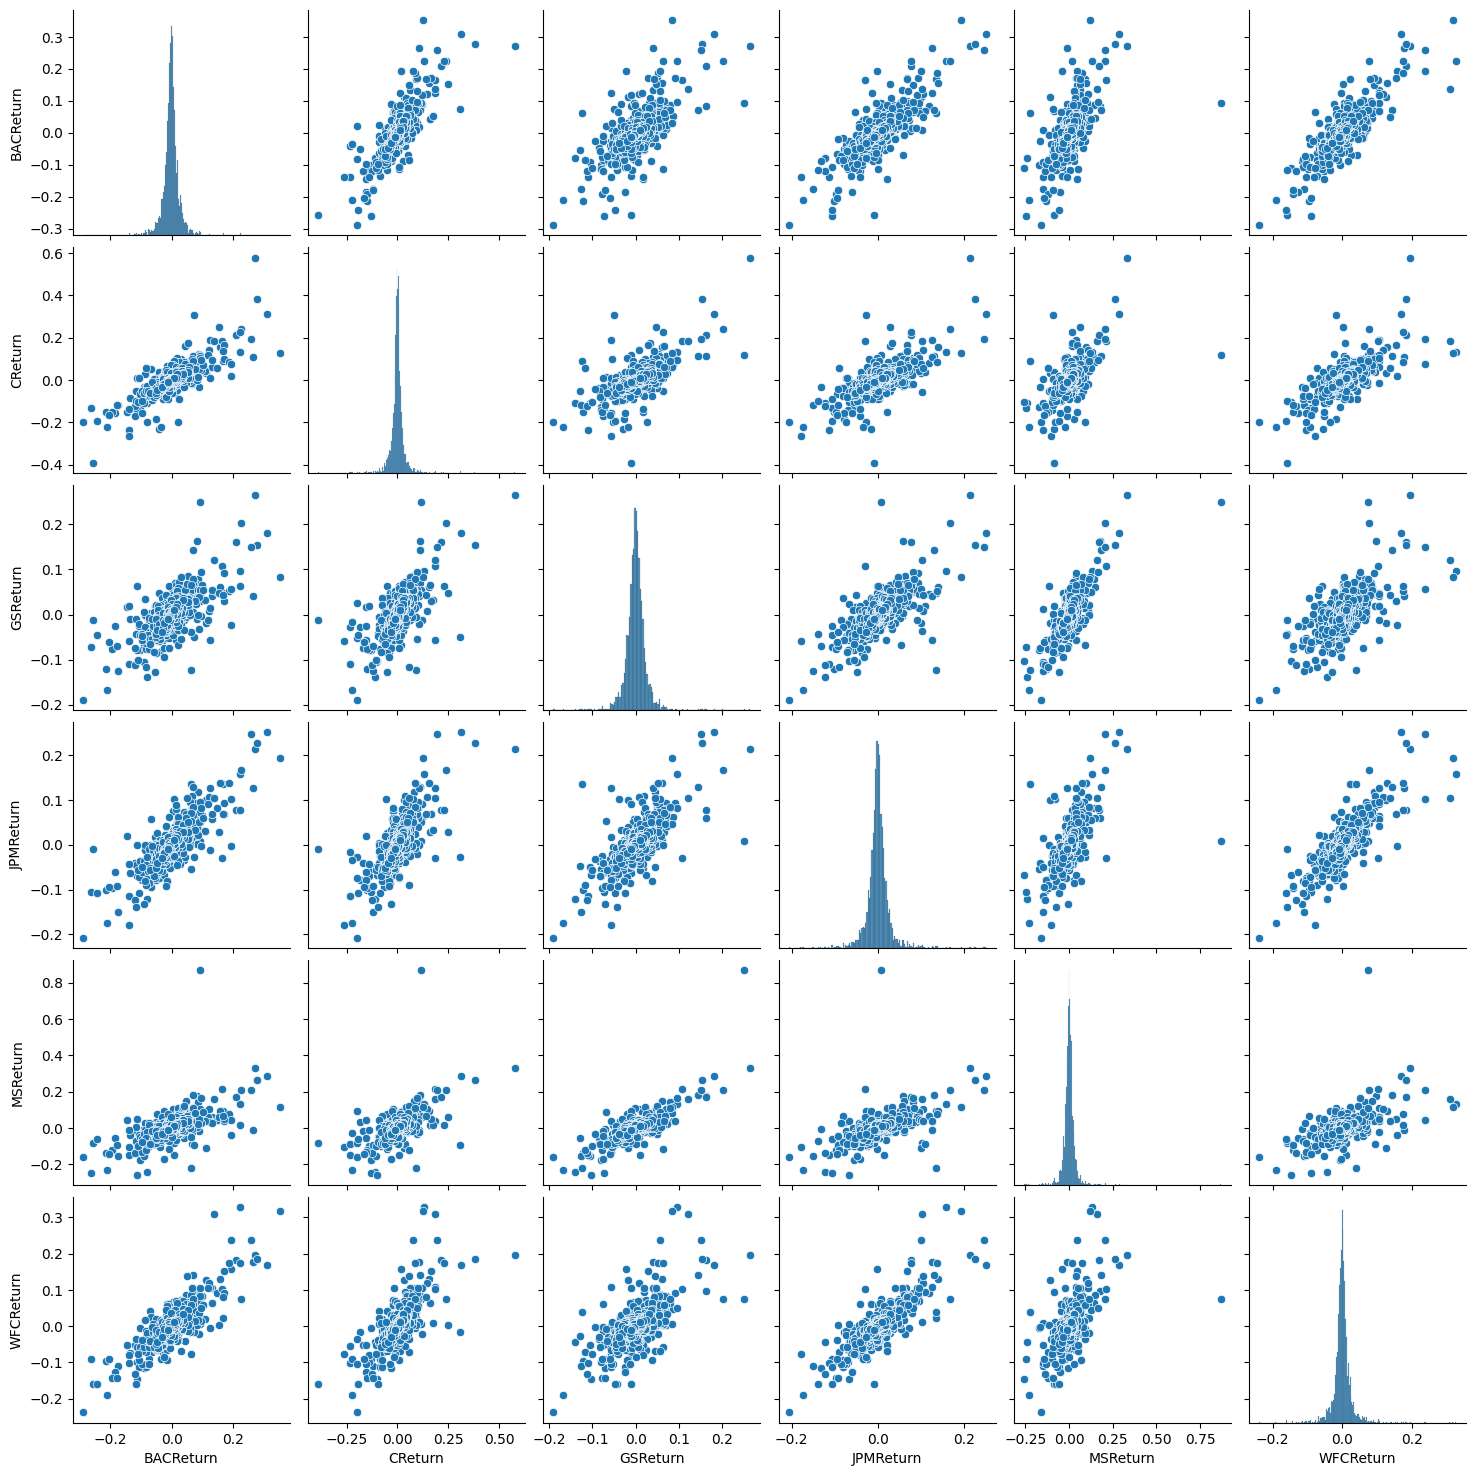

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(returns.dropna())

In [39]:
returns = returns.dropna()
returns.idxmin()


BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [40]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [41]:
returns.std()

BACReturn    0.036647
CReturn      0.038672
GSReturn     0.025390
JPMReturn    0.027667
MSReturn     0.037819
WFCReturn    0.030238
dtype: float64

In [42]:
returns.loc['2015-01-01':'2015-12-31'].std()

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

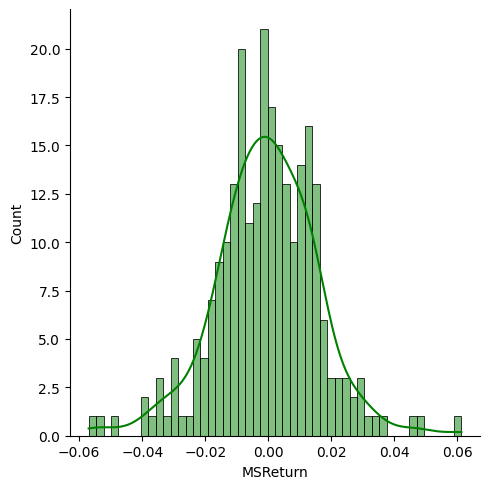

In [43]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'],color = 'green',kde = True,bins = 50)

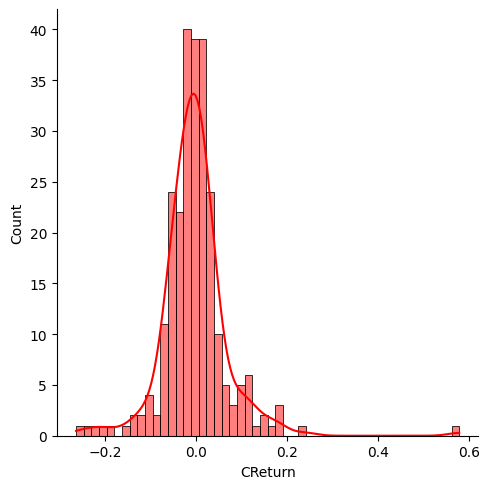

In [44]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['CReturn'],color = 'red',kde = True,bins = 50)

In [45]:
 bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info   Adj Close      Close       High        Low       Open    Volume   
Date                                                                           
2006-01-03   30.991043  47.080002  47.180000  46.150002  46.919998  16296700   
2006-01-04   30.661896  46.580002  47.240002  46.450001  47.000000  17757900   
2006-01-05   30.701403  46.639999  46.830002  46.320000  46.580002  14970700   
2006-01-06   30.655329  46.570000  46.910000  46.349998  46.799999  12599800   
2006-01-09   30.675077  46.599998  46.970001  46.360001  46.720001  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info    Adj Close       Close        High         Low  ...       High   
Date                                                         ...              
2006-01-03   321.442719  492.899994  493.799988  481.100006  ...  58.490002   
2006-01-04   315.508087  483.799988  491.000000  483.500000  ...  59.279999   
2006-01-05   317.073425  486.200012  487.799988  484.000000  ...  58.590000   
2006-01-06   317.073425  486.200012  489.000000  482.000000  ...  58.849998   
2006-01-09   315.573456  483.899994  487.399994  483.000000  ...  59.290001   

Bank Ticker                                       WFC                        \
Stock Info         Low       Open   Volume  Adj Close      Close       High   
Date                                                                          
2006-01-03   56.740002  57.169998  5377000  18.675650  31.900000  31.975000   
2006-01-04   58.349998  58.700001  7977800  18.459042  31.530001  31.820000   
2006-01-05   58.020000  58.549999  5778000  18.438549  31.495001  31.555000   
2006-01-06   58.049999  58.770000  6889800  18.546852  31.680000  31.775000   
2006-01-09   58.619999  58.630001  4144500  18.543930  31.674999  31.825001   

Bank Ticker                                  
Stock Info         Low       Open    Volume  
Date                                         
2006-01-03   31.195000  31.600000  11016400  
2006-01-04   31.365000  31.799999  10870000  
2006-01-05   31.309999  31.500000  10158000  
2006-01-06   31.385000  31.580000   8403800  
2006-01-09   31.555000  31.674999   5619600  

[5 rows x 36 columns]

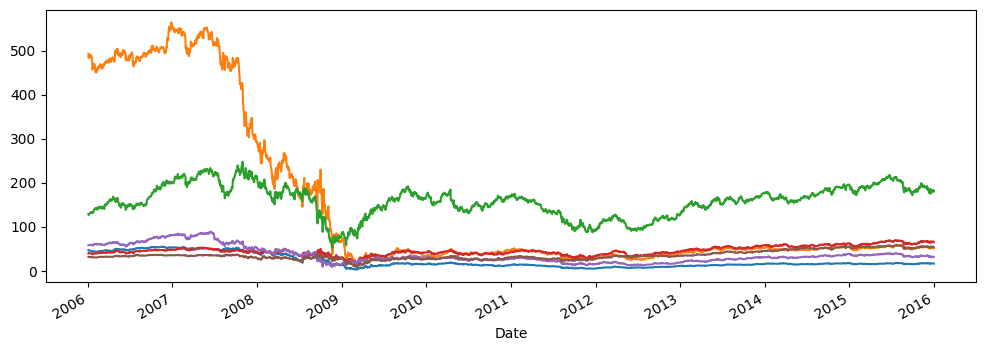

In [46]:
for tick in tickers:
    bank_stocks[tick]["Close"].plot(label = tick,figsize = (12,4))
    

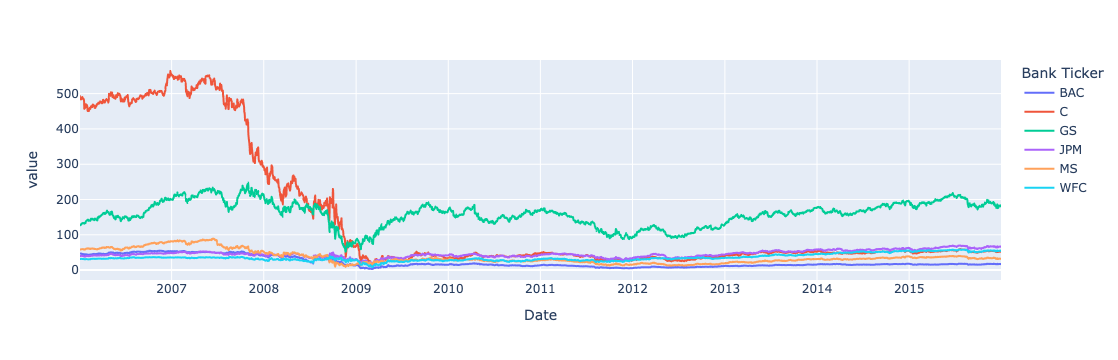

In [54]:
import plotly.express as px
close_price = bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info')
fig = px.line(close_price)
fig.show()


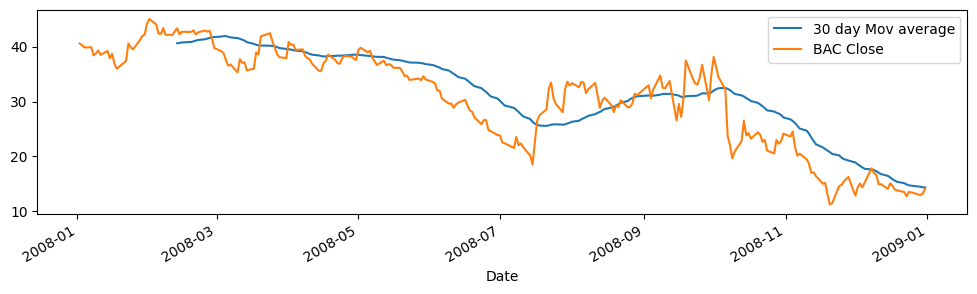

In [48]:
plt.figure(figsize= (12,3))
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window = 30).mean().plot(label = '30 day Mov average' )
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label = 'BAC Close')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

In [49]:
data = bank_stocks.xs(key = 'Close' ,level = 'Stock Info',axis = 1).corr()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

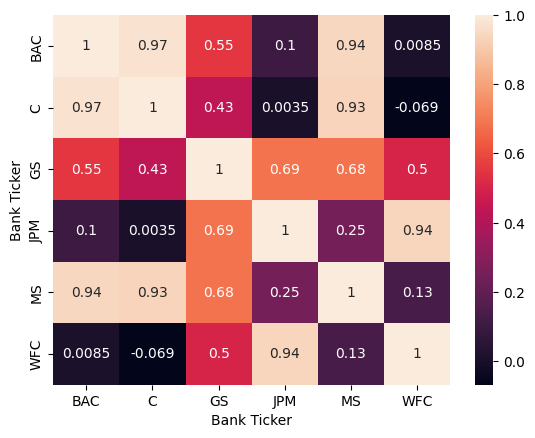

In [50]:
sns.heatmap(data,annot = True)

In [29]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info   Adj Close      Close       High        Low       Open    Volume   
Date                                                                           
2006-01-03   30.991043  47.080002  47.180000  46.150002  46.919998  16296700   
2006-01-04   30.661896  46.580002  47.240002  46.450001  47.000000  17757900   
2006-01-05   30.701403  46.639999  46.830002  46.320000  46.580002  14970700   
2006-01-06   30.655329  46.570000  46.910000  46.349998  46.799999  12599800   
2006-01-09   30.675077  46.599998  46.970001  46.360001  46.720001  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info    Adj Close       Close        High         Low  ...       High   
Date                                                         ...              
2006-01-03   321.442719  492.899994  493.799988  481.100006  ...  58.490002   
2006-01-04   315.508087  483.799988  491.000000  483.500000  ...  59.279999   
2006-01-05   317.073425  486.200012  487.799988  484.000000  ...  58.590000   
2006-01-06   317.073425  486.200012  489.000000  482.000000  ...  58.849998   
2006-01-09   315.573456  483.899994  487.399994  483.000000  ...  59.290001   

Bank Ticker                                       WFC                        \
Stock Info         Low       Open   Volume  Adj Close      Close       High   
Date                                                                          
2006-01-03   56.740002  57.169998  5377000  18.675650  31.900000  31.975000   
2006-01-04   58.349998  58.700001  7977800  18.459042  31.530001  31.820000   
2006-01-05   58.020000  58.549999  5778000  18.438549  31.495001  31.555000   
2006-01-06   58.049999  58.770000  6889800  18.546852  31.680000  31.775000   
2006-01-09   58.619999  58.630001  4144500  18.543930  31.674999  31.825001   

Bank Ticker                                  
Stock Info         Low       Open    Volume  
Date                                         
2006-01-03   31.195000  31.600000  11016400  
2006-01-04   31.365000  31.799999  10870000  
2006-01-05   31.309999  31.500000  10158000  
2006-01-06   31.385000  31.580000   8403800  
2006-01-09   31.555000  31.674999   5619600  

[5 rows x 36 columns]

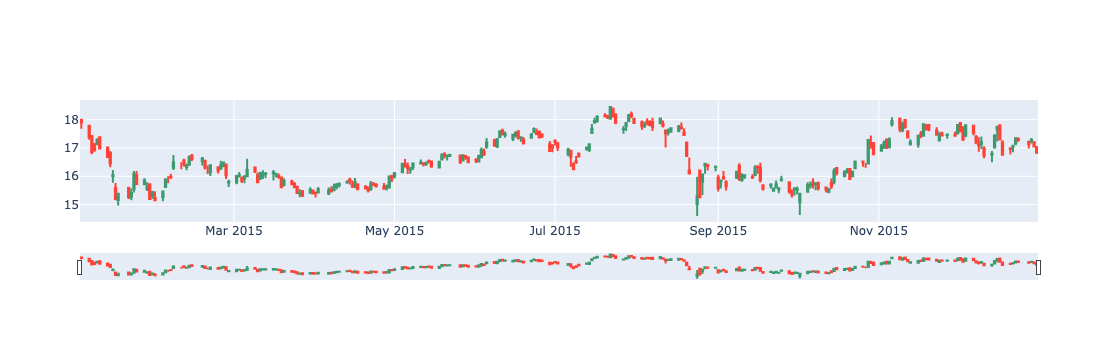

In [56]:
import plotly.graph_objects as go
bac15 = bank_stocks['BAC'][['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac15.head()
fig = go.Figure(data=[go.Candlestick(x = bac15.index,open = bac15['Open'],high = bac15['High'],low = bac15['Low'],close = bac15['Close'], name = 'BAC')])
fig.show()

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

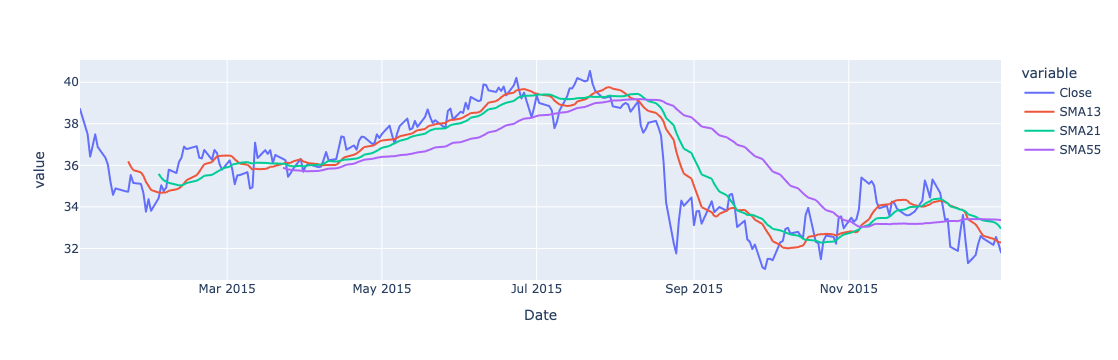

In [60]:
ms = bank_stocks['MS']['Close'].loc['2015-01-01':'2016-01-01']
df = pd.DataFrame({'Close':ms})
for p in [13,21,55]:
    df[f'SMA{p}'] = df['Close'].rolling(p).mean()
fig = px.line(df)
fig.show()

,Close,SMA13,SMA21,SMA55
Date,,,,
2015-01-02,38.709999,NaN,NaN,NaN
2015-01-05,37.500000,NaN,NaN,NaN
2015-01-06,36.419998,NaN,NaN,NaN
2015-01-07,36.939999,NaN,NaN,NaN
2015-01-08,37.490002,NaN,NaN,NaN


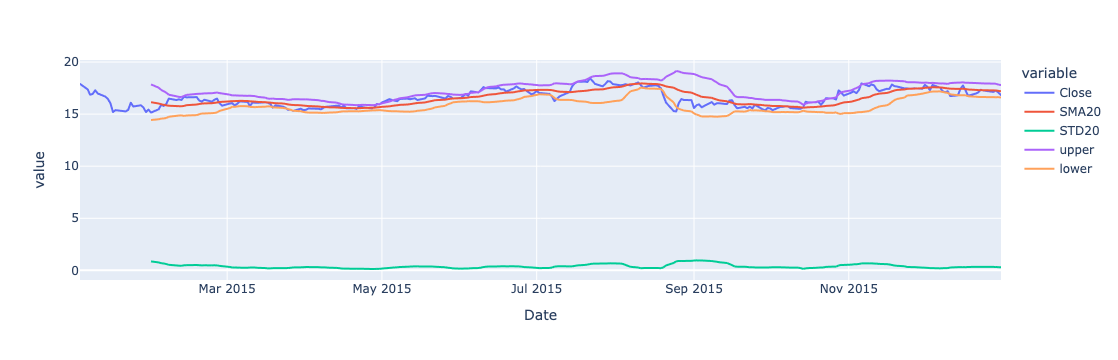

In [66]:
boll = bank_stocks['BAC']['Close'].loc['2015-01-01':'2016-01-01']
df = pd.DataFrame({'Close':boll})

df['SMA20'] = df['Close'].rolling(20).mean()
df['STD20'] = df['Close'].rolling(20).std()
df['upper'] = df['SMA20'] + 2 * df['STD20'] 
df['lower'] = df['SMA20'] - 2 * df['STD20'] 
fig = px.line(df)
fig.show()